# Data exploration

## Aim of this notebook

- Load filtered structures from `prepare_dataset.ipynb` by structure KLIFS IDs.
- Explore kinases in dataset
- Explore structures in dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from opencadd.databases.klifs import setup_remote

from kissim.dataset import filters
from kissim.dataset import explorer
from kissim.definitions import ANCHOR_RESIDUES

RDKit WARNING: [16:35:04] Enabling RDKit 2019.09.3 jupyter extensions
INFO:opencadd.databases.klifs.api:If you want to see an non-truncated version of the DataFrames in this module, use `pd.set_option('display.max_columns', 50)` in your notebook.


In [3]:
pd.set_option("display.max_columns", 50)

In [4]:
SPECIES = "Human"
DFG_CONFORMATION = "in"
RESOLUTION_MAX = 4

HERE = Path(_dh[-1])
DATA = HERE / "../../data/processed/"

## Load structures (metadata) from KLIFS structure IDs

In [5]:
remote = setup_remote()

INFO:opencadd.databases.klifs.api:Set up remote session...
INFO:opencadd.databases.klifs.api:Remote session is ready!


In [6]:
structure_klifs_ids = pd.read_csv(DATA / "structure_klifs_ids.txt", squeeze=True, header=None).to_list()
print(f"Number of structures: {len(structure_klifs_ids)}")

Number of structures: 4944


In [7]:
structures = remote.structures.by_structure_klifs_id(structure_klifs_ids)

## Explore kinases in dataset

### Number structures per kinase

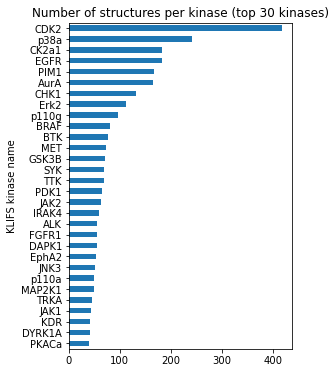

In [8]:
explorer.plot_number_of_structures_per_kinase(structures);

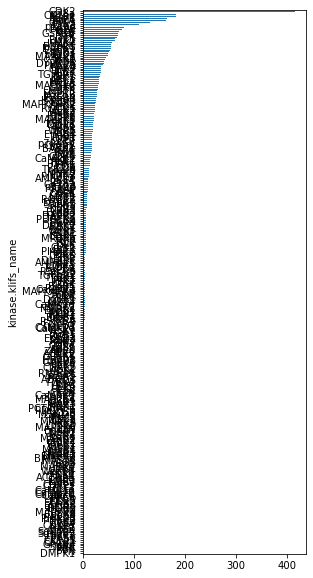

In [9]:
structures.groupby("kinase.klifs_name").size().sort_values().plot(kind="barh", figsize=(4, 10));

In [10]:
for i in [1, 2, 3, 4, 5]:
    print(
        f"Number of kinase with {i} structure: {sum(structures.groupby('kinase.klifs_name').size() == i)}"
    )
for i in [5, 10]:
    print(
        f"Number of kinase with > {i} structures: {sum(structures.groupby('kinase.klifs_name').size() > i)}"
    )

Number of kinase with 1 structure: 61
Number of kinase with 2 structure: 40
Number of kinase with 3 structure: 25
Number of kinase with 4 structure: 20
Number of kinase with 5 structure: 16
Number of kinase with > 5 structures: 131
Number of kinase with > 10 structures: 93


### Number of kinases per kinase group

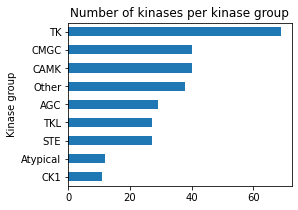

In [11]:
explorer.plot_number_of_kinases_per_kinase_group(structures, remote);

## Explore structures in dataset

### Species, DFG/aC-helix conformations, ligand

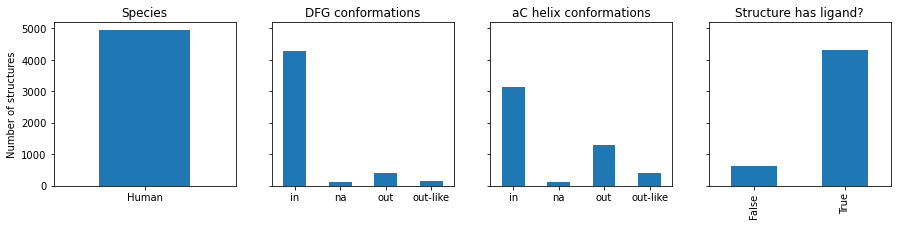

In [12]:
explorer.plot_important_categories(structures);

### Resolution vs. quality score

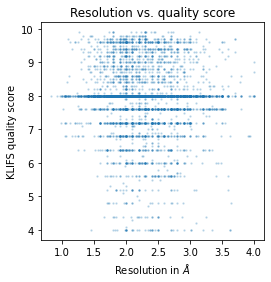

In [13]:
explorer.plot_resolution_vs_qualityscore(structures);

## Explore pockets in final dataset

### Missing residues in the kinase binding site

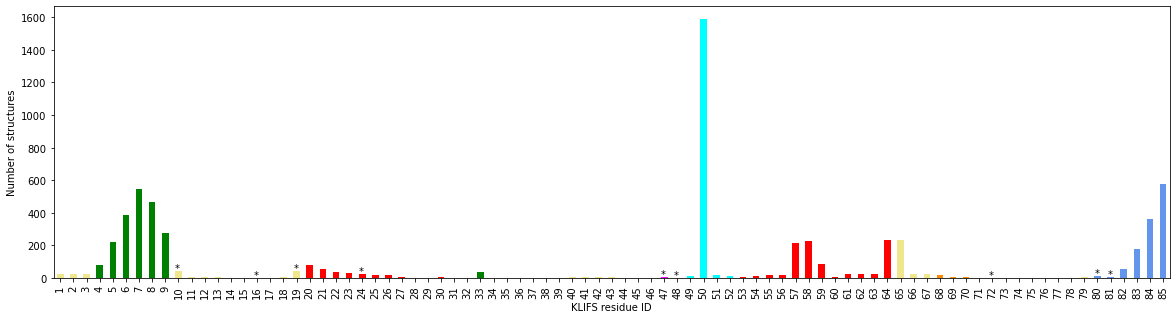

In [14]:
explorer.plot_missing_residues(structures, remote, ANCHOR_RESIDUES);

### Number of structures that will have no subpocket centers

... because the subpockets' anchor residues are missing (gaps in the structure).

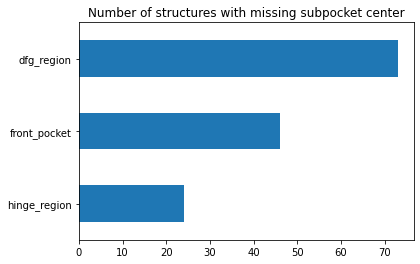

In [15]:
explorer.plot_missing_subpockets(structures, ANCHOR_RESIDUES);

### Modified residues

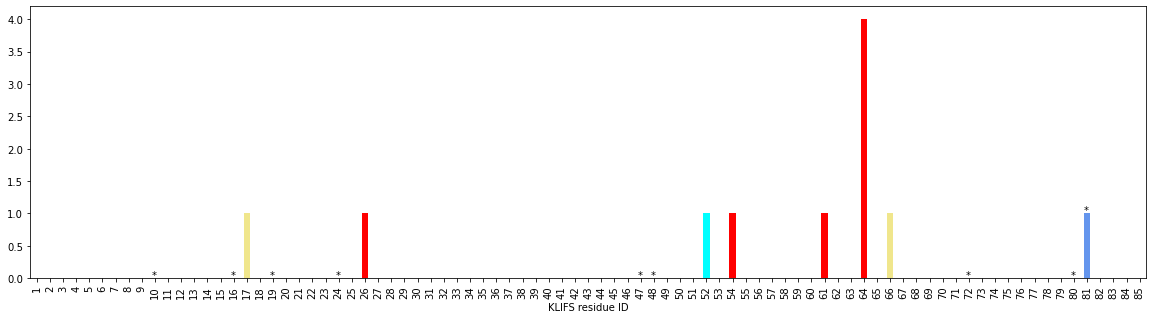

In [16]:
explorer.plot_modified_residues(structures, remote, ANCHOR_RESIDUES);

In [17]:
structures[structures["structure.pocket"].str.contains("X")]

,structure.klifs_id,structure.pdb_id,structure.alternate_model,structure.chain,species.klifs,kinase.klifs_id,kinase.klifs_name,kinase.family,kinase.group,structure.pocket,ligand.expo_id,ligand_allosteric.expo_id,ligand.name,ligand_allosteric.name,structure.dfg,structure.ac_helix,structure.resolution,structure.qualityscore,structure.missing_residues,structure.missing_atoms,structure.rmsd1,structure.rmsd2,structure.front,structure.gate,structure.back,structure.fp_i,structure.fp_ii,structure.bp_i_a,structure.bp_i_b,structure.bp_ii_in,structure.bp_ii_a_in,structure.bp_ii_b_in,structure.bp_ii_out,structure.bp_ii_b,structure.bp_iii,structure.bp_iv,structure.bp_v,structure.grich_distance,structure.grich_angle,structure.grich_rotation,structure.filepath
692,1649,2ydj,-,A,Human,121,CHK1,None,None,QTLGEGAYGEVQLVAVKIVNIKKEIXINKMLNENVVKFYGHYLFLE...,YDJ,-,None,None,in,in,1.85,9.7,0,3,0.776,2.099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,17.4342,57.4107,41.3220,None
858,2020,4j8m,-,A,Human,259,AurA,None,None,RPLGKGKFGNVYLLALKVLQLRREVEIQSHLRPNILRLYGYYLILE...,CJ5,-,None,None,in,out,1.85,8.0,0,0,0.837,2.069,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,20.3792,67.2635,45.1622,None
1065,2398,1yi3,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,LY2,-,None,None,in,in,2.50,8.0,0,0,0.802,2.134,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.5558,54.2631,41.4340,None
1069,2403,1yi4,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,ADN,-,None,None,in,in,2.40,8.0,0,0,0.807,2.139,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.4236,53.6127,36.7024,None
1100,2444,1yhs,-,A,Human,160,PIM1,None,None,PLLGSGGFGSVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,STU,-,None,None,in,in,2.15,8.0,0,0,0.813,2.141,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16.2773,53.1849,41.9412,None
1596,3450,2r9s,-,A,Human,247,JNK3,None,None,KPIGSGAQGIVCAVAIKKLRAYRELVLMKCVNKNIISLLNVYLVME...,255,-,None,None,in,in,2.40,8.0,0,0,0.850,2.207,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.7668,49.0987,28.8980,None
2062,4389,1oir,-,A,Human,198,CDK2,None,None,EKIGEGTYGVVYKVALXKITAIREISLLKELNPNIVKLLDVYLVFE...,HDY,-,None,None,in,out,1.91,9.0,0,10,0.834,2.186,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14.1404,48.0568,68.2467,None
2499,5334,3c7q,-,A,Human,485,KDR,None,None,KPLGRGAFGQVIEVAVKMLALMSELKILIHIGLNVVNLLGAMVIVE...,XIN,-,None,None,out,out,2.10,6.8,3,0,0.826,2.174,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,19.0517,64.3878,43.1425,None
3196,7215,2j5e,-,A,Human,406,EGFR,None,None,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,-,-,None,None,in,in,3.10,8.0,0,0,0.777,2.109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,18.2436,58.9093,24.0771,None
3582,8654,5o12,-,A,Human,160,PIM1,None,None,PLLGS____SVYSVAIKHVRVPMEVVLLKKVSSGVIRLLDWVLILE...,1RO,-,None,None,in,in,2.40,7.6,4,8,0.803,2.006,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0000,0.0000,0.0000,None
